In [62]:
import ultralytics
from ultralytics import YOLO

In [63]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image 

import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')  # Suppress Matplotlib warnings

In [64]:
plt.rcParams["figure.figsize"] = [3.0, 3.0]

In [65]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

# For the classification model

In [ ]:
img = cv2.imread('D:\\Dissertation-Project\\Projects\\code\\YOLO-V11-CAM\\images\\Z1.1.JPG')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [67]:
model = YOLO('D:\\Dissertation-Project\\Projects\\code\\best.pt') 
model = model.cpu()

In [68]:
target_layers =[model.model.model[-2]]

In [69]:
cam = EigenCAM(model, target_layers,task='cls')

0: 224x224 male 1.00, female 0.00, 19.5ms
Speed: 9.4ms preprocess, 19.5ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


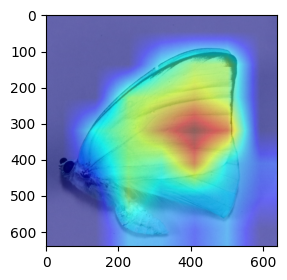

In [70]:
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()


0: 224x224 male 1.00, female 0.00, 16.6ms
Speed: 6.2ms preprocess, 16.6ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


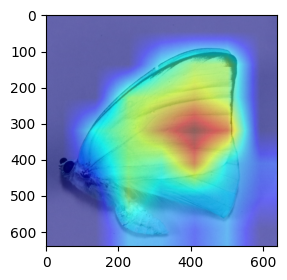

In [71]:
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

In [72]:
target_layers =[model.model.model[-2], model.model.model[-3], model.model.model[-4]]


0: 224x224 male 1.00, female 0.00, 13.1ms
Speed: 6.0ms preprocess, 13.1ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


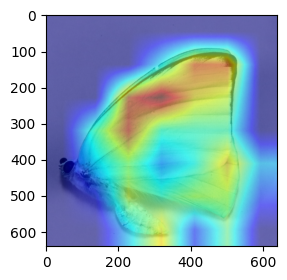

In [73]:
cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

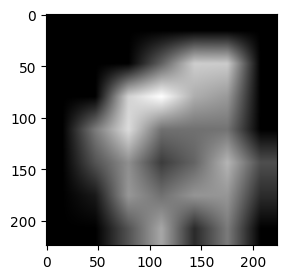

In [74]:
g_scale = cv2.resize(np.stack([grayscale_cam] * 3, axis=2), (224,224))

plt.imshow(g_scale, cmap='gray')
plt.show()

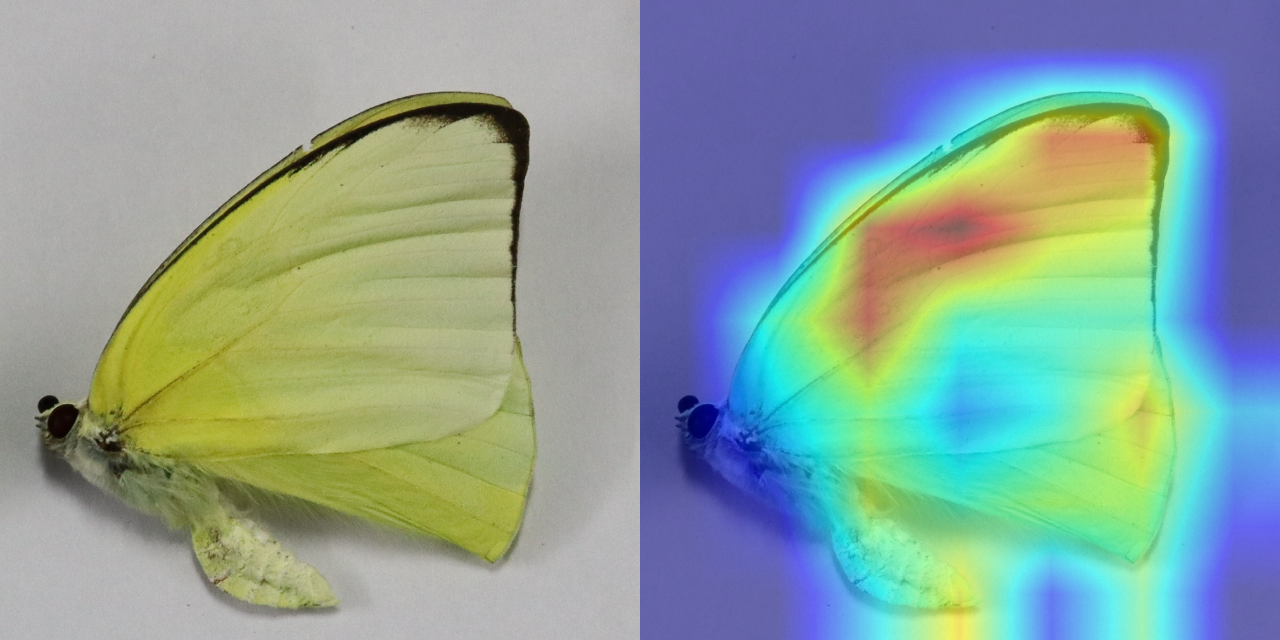

In [75]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))